In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
##reading the data 
df = pd.read_excel(r"C:\Users\pawan\MLSOLAR\notebook\data\Fault.xlsx")

In [4]:
## printing first 5 rows
df.head(5)

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective/Non Defective
0,8.491664,1.544891,101.300049,142.968750,0.381835,-0.490112,0.094844,-110.466919,150.391235,-39.679209,0.465142,50.185838,154.751450,49.995163,0
1,2.946039,2.320648,90.728760,146.777344,0.039428,0.584106,-0.670537,-5.605316,-130.718384,136.930440,0.669008,49.907602,154.872942,50.001987,0
2,6.059431,1.536377,101.623535,142.968750,0.301269,0.134277,-0.381841,-113.673401,-30.859375,147.361552,0.447712,49.934645,154.892021,50.008262,1
3,0.762262,2.373627,88.256836,147.363281,0.240844,0.429688,-0.636968,-69.505920,-84.935608,154.325002,0.690778,50.330598,154.803659,49.993744,1
4,0.601378,2.286591,88.409424,147.656250,0.475829,0.187988,-0.663823,-106.067047,-46.361389,150.969849,0.699244,49.948302,155.071592,50.004186,1


In [5]:
##shape of the data
df.shape

(30000, 15)

In [6]:
##checking missing values

df.isnull().sum()

Time                        0
Ipv                         0
Vpv                         0
Vdc                         0
ia                          0
ib                          0
ic                          0
va                          0
vb                          0
vc                          0
Iabc                        0
If                          0
Vabc                        0
Vf                          0
Defective/Non Defective     0
dtype: int64

In [10]:
##checking duplicates
df.duplicated().sum()

##if there is duplicates uncomment the below code 

#df.drop_duplicates()


0

In [11]:
##checking null and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      30000 non-null  float64
 1   Ipv                       30000 non-null  float64
 2   Vpv                       30000 non-null  float64
 3   Vdc                       30000 non-null  float64
 4   ia                        30000 non-null  float64
 5   ib                        30000 non-null  float64
 6   ic                        30000 non-null  float64
 7   va                        30000 non-null  float64
 8   vb                        30000 non-null  float64
 9   vc                        30000 non-null  float64
 10  Iabc                      30000 non-null  float64
 11  If                        30000 non-null  float64
 12  Vabc                      30000 non-null  float64
 13  Vf                        30000 non-null  float64
 14  Defect

In [12]:
##checking statistics of the data

df.describe()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective/Non Defective
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6.625781,1.757652,91.976542,137.076787,-0.022879,0.025592,-0.048809,0.663288,1.025666,0.747015,0.618741,49.341476,154.887091,49.999756,0.666667
std,3.932605,0.434881,23.871453,37.592898,0.747015,0.770528,0.741239,109.922547,109.956147,109.495462,0.847313,4.971143,6.953803,0.023232,0.471412
min,0.000025,0.718048,1.116943,0.585938,-6.358888,-7.264404,-12.688359,-159.034271,-159.215088,-157.752482,0.000001,-0.022219,1.000000,49.492334,0.000000
25%,3.253257,1.431366,90.490723,142.968750,-0.383546,-0.328979,-0.348271,-109.267502,-108.936005,-108.164520,0.451276,49.905288,154.979409,49.995819,0.000000
50%,6.501575,1.517456,101.202393,143.847656,-0.000855,0.020142,-0.059575,1.090927,1.458588,0.642904,0.484648,50.005100,155.246966,50.000088,1.000000
75%,9.821328,2.231720,101.635742,146.777344,0.334838,0.369263,0.289546,110.454865,111.268539,109.849129,0.669136,50.113791,155.446422,50.004349,1.000000
max,14.369075,3.061401,106.304932,237.890625,11.271728,6.438599,6.352168,160.324097,159.649048,159.207052,6.460823,51.337426,156.268283,50.461928,1.000000


In [13]:
data1 = df.drop(columns=['Defective/Non Defective '])

In [16]:
##Finding mean median mode variance standard deviation
columns_to_analyze = data1.columns

# Calculate statistics
statistics = pd.DataFrame(index=columns_to_analyze, columns=['Mean', 'Median', 'Mode', 'Variance', 'Standard Deviation'])

for column in columns_to_analyze:
    mean_value = data1[column].mean()
    median_value = data1[column].median()
    mode_value = data1[column].mode()[0]  # Taking the first mode value in case of multimodal data
    variance_value = data1[column].var()
    std_dev_value = data1[column].std()
    
    statistics.loc[column] = [mean_value, median_value, mode_value, variance_value, std_dev_value]

# Display the statistics
print(statistics)

            Mean      Median        Mode      Variance Standard Deviation
Time    6.625781    6.501575     0.97314      15.46538           3.932605
Ipv     1.757652    1.517456    1.478668      0.189122           0.434881
Vpv    91.976542  101.202393  101.409912    569.846252          23.871453
Vdc   137.076787  143.847656  143.554688   1413.225967          37.592898
ia     -0.022879   -0.000855    0.005858      0.558032           0.747015
ib      0.025592    0.020142    0.006714      0.593714           0.770528
ic     -0.048809   -0.059575   -0.341558      0.549435           0.741239
va      0.663288    1.090927 -154.766998  12082.966361         109.922547
vb      1.025666    1.458588 -152.151184  12090.354316         109.956147
vc      0.747015    0.642904  154.184367   11989.25625         109.495462
Iabc    0.618741    0.484648         1.0      0.717939           0.847313
If     49.341476     50.0051        50.0     24.712262           4.971143
Vabc  154.887091  155.246966         1

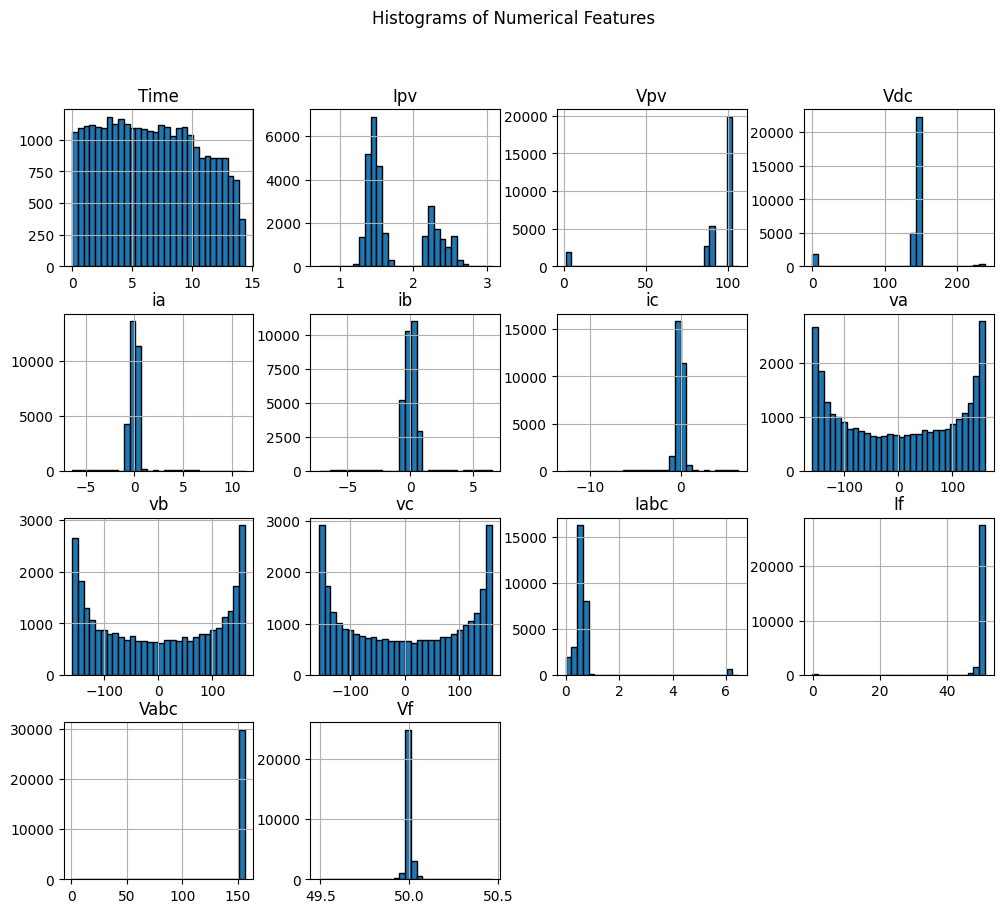

In [17]:
## Plotting Histogram fro all numerical features
data1.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

Time       Axes(0.125,0.11;0.0466867x0.77)
Ipv     Axes(0.181024,0.11;0.0466867x0.77)
Vpv     Axes(0.237048,0.11;0.0466867x0.77)
Vdc     Axes(0.293072,0.11;0.0466867x0.77)
ia      Axes(0.349096,0.11;0.0466867x0.77)
ib       Axes(0.40512,0.11;0.0466867x0.77)
ic      Axes(0.461145,0.11;0.0466867x0.77)
va      Axes(0.517169,0.11;0.0466867x0.77)
vb      Axes(0.573193,0.11;0.0466867x0.77)
vc      Axes(0.629217,0.11;0.0466867x0.77)
Iabc    Axes(0.685241,0.11;0.0466867x0.77)
If      Axes(0.741265,0.11;0.0466867x0.77)
Vabc    Axes(0.797289,0.11;0.0466867x0.77)
Vf      Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

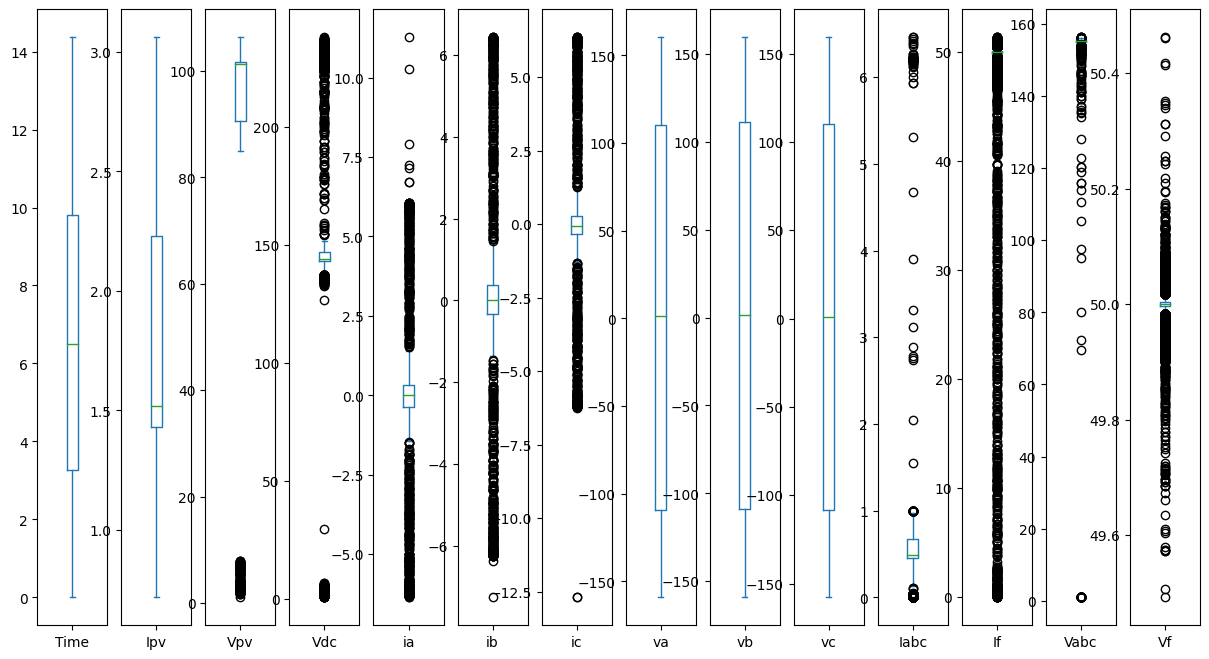

In [18]:
##Plotting BOX plot for all numerical features
data1.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 8))

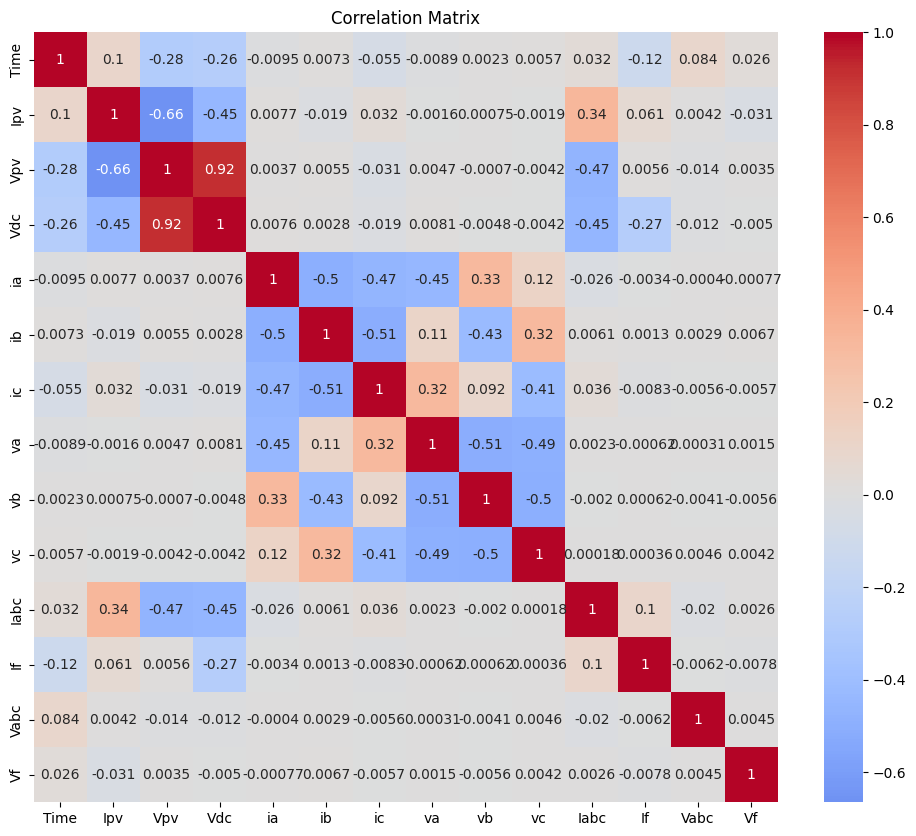

In [19]:
## Correlation Matrix
corr_matrix = data1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [20]:
#Finding skewness and kurtosis 
statistics = pd.DataFrame(index=data1.columns, columns=['Skewness', 'Kurtosis'])

for column in data1.columns:
    skewness_value = data1[column].skew()
    kurtosis_value = data1[column].kurt()
    
    statistics.loc[column] = [skewness_value, kurtosis_value]

# Display the skewness and kurtosis
print(statistics)

       Skewness    Kurtosis
Time   0.114887   -1.111139
Ipv    0.758712   -1.083067
Vpv   -3.279081    9.400712
Vdc   -2.680479    8.598202
ia     -0.10905   36.672088
ib     0.088248   35.458429
ic     0.056013   40.948955
va     0.001067   -1.502844
vb    -0.004071   -1.502283
vc    -0.000272   -1.493552
Iabc   6.145156   37.765892
If    -8.328405   71.371379
Vabc -21.580826    471.3494
Vf    -2.603007  101.645061


In [22]:
## Treating outliers by using Winsorization method
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both',
                    fold = 1.5,
                    variables = ['Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc',
       'If', 'Vabc', 'Vf'])

In [23]:
winsored_data = winsor.fit_transform(df)

In [25]:
##making winsored data as a DataFrame
winsored_data = pd.DataFrame(winsored_data, columns = df.columns)

In [26]:
winsored_data.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective/Non Defective
0,8.491664,1.544891,101.300049,142.968750,0.381835,-0.490112,0.094844,-110.466919,150.391235,-39.679209,0.465142,50.185838,154.751450,49.995163,0
1,2.946039,2.320648,90.728760,146.777344,0.039428,0.584106,-0.670537,-5.605316,-130.718384,136.930440,0.669008,49.907602,154.872942,50.001987,0
2,6.059431,1.536377,101.623535,142.968750,0.301269,0.134277,-0.381841,-113.673401,-30.859375,147.361552,0.447712,49.934645,154.892021,50.008262,1
3,0.762262,2.373627,88.256836,147.363281,0.240844,0.429688,-0.636968,-69.505920,-84.935608,154.325002,0.690778,50.330598,154.803659,49.993744,1
4,0.601378,2.286591,88.409424,147.656250,0.475829,0.187988,-0.663823,-106.067047,-46.361389,150.969849,0.699244,49.948302,155.071592,50.004186,1


Time                           Axes(0.125,0.11;0.0435393x0.77)
Ipv                         Axes(0.177247,0.11;0.0435393x0.77)
Vpv                         Axes(0.229494,0.11;0.0435393x0.77)
Vdc                         Axes(0.281742,0.11;0.0435393x0.77)
ia                          Axes(0.333989,0.11;0.0435393x0.77)
ib                          Axes(0.386236,0.11;0.0435393x0.77)
ic                          Axes(0.438483,0.11;0.0435393x0.77)
va                           Axes(0.49073,0.11;0.0435393x0.77)
vb                          Axes(0.542978,0.11;0.0435393x0.77)
vc                          Axes(0.595225,0.11;0.0435393x0.77)
Iabc                        Axes(0.647472,0.11;0.0435393x0.77)
If                          Axes(0.699719,0.11;0.0435393x0.77)
Vabc                        Axes(0.751966,0.11;0.0435393x0.77)
Vf                          Axes(0.804213,0.11;0.0435393x0.77)
Defective/Non Defective     Axes(0.856461,0.11;0.0435393x0.77)
dtype: object

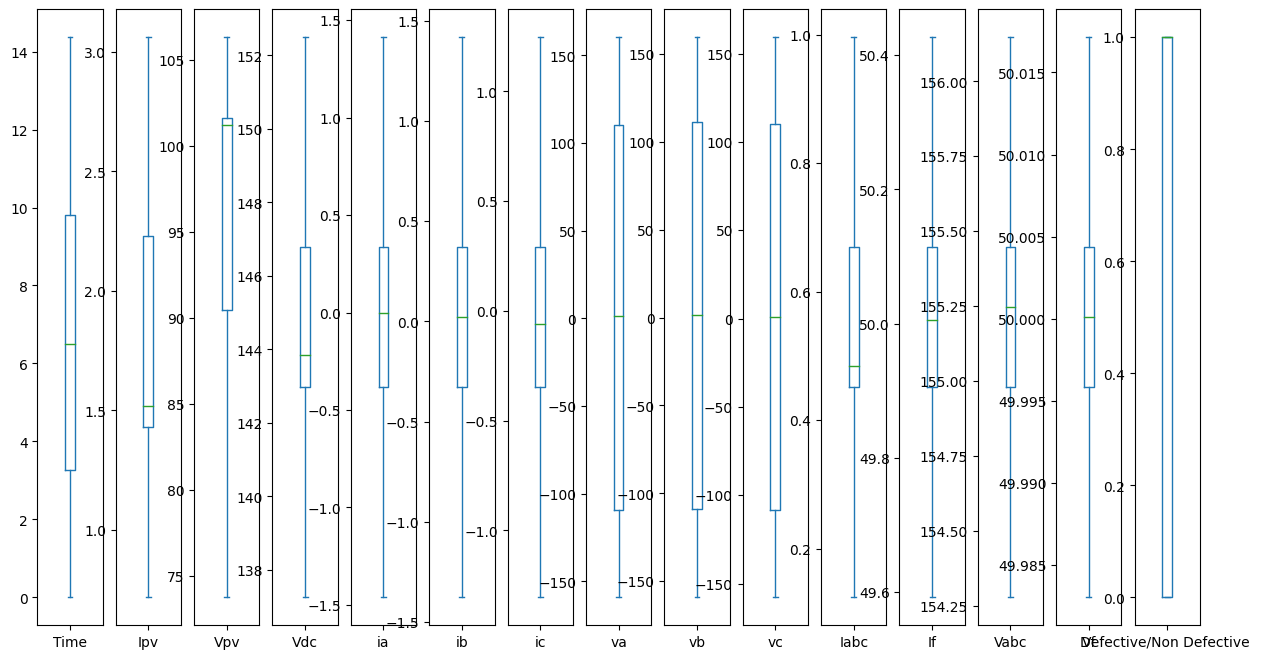

In [27]:
##Crosschecking whether the outliers 

winsored_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 8))

In [28]:
## saving the cleaned data 
winsored_data.to_csv(r'C:\Users\pawan\MLSOLAR\notebook\data\cleaned_data.csv', index=False)